# Making an accurate detector for fake disaster tweets

## Data loading and description

First of all, let's proceed to load and to review dataset structure

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

Let's have a general view of dataset

In [5]:
train.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [6]:
test.head(10)

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
5,12,NaN,NaN,We're shaking...It's an earthquake
6,21,NaN,NaN,They'd probably still show more life than Arse...
7,22,NaN,NaN,Hey! How are you?
8,27,NaN,NaN,What a nice hat?
9,29,NaN,NaN,Fuck off!


Column analysis

In [8]:
print(train.columns)
train.describe()

Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')


,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [12]:
train.dtypes

id           int64
keyword     object
location    object
text        object
target       int64
dtype: object

In [16]:
print(test.columns)

Index(['id', 'keyword', 'location', 'text'], dtype='object')


In [17]:
test.dtypes

id           int64
keyword     object
location    object
text        object
dtype: object

Count the number of records stored in train and test datasets

In [18]:
print('Number of records in train: {}'.format(len(train)))
print('Number of records in test: {}'.format(len(test)))

Number of records in train: 7613
Number of records in test: 3263


`id` value is useless and can be removed as is used to identify each record and hold unique values for each one

In [15]:
id_num_uniq = train['id'].nunique()
print('Number of unique values is {} and number of records {}'.format(id_num_uniq, len(train)))

Number of unique values is 7613 and number of records 7613


## Preliminar data distribution analysis

Let's analyze how each column does distribute in order to have a more detailed vision of data comprised

###### keyword

Analyze values for keyword

In [19]:
# Count number of different values on keyword column
# Train set
keyword_uniq_train = train['keyword'].dropna().unique()
keyword_num_uniq_train = keyword_uniq_train.size

# Test set 
keyword_uniq_test = test['keyword'].dropna().unique()
keyword_num_uniq_test = keyword_uniq_test.size

# Display count
print('(Train) Number of different values for keyword: {}'.format(keyword_num_uniq_train))
print('(Test) Number of different values for keyword: {}'.format(keyword_num_uniq_test))


print('(Train) Keyword different values: {}'.format(keyword_uniq_train))

(Train) Number of different values for keyword: 221
(Test) Number of different values for keyword: 221
(Train) Keyword different values: ['ablaze' 'accident' 'aftershock' 'airplane%20accident' 'ambulance'
 'annihilated' 'annihilation' 'apocalypse' 'armageddon' 'army' 'arson'
 'arsonist' 'attack' 'attacked' 'avalanche' 'battle' 'bioterror'
 'bioterrorism' 'blaze' 'blazing' 'bleeding' 'blew%20up' 'blight'
 'blizzard' 'blood' 'bloody' 'blown%20up' 'body%20bag' 'body%20bagging'
 'body%20bags' 'bomb' 'bombed' 'bombing' 'bridge%20collapse'
 'buildings%20burning' 'buildings%20on%20fire' 'burned' 'burning'
 'burning%20buildings' 'bush%20fires' 'casualties' 'casualty'
 'catastrophe' 'catastrophic' 'chemical%20emergency' 'cliff%20fall'
 'collapse' 'collapsed' 'collide' 'collided' 'collision' 'crash' 'crashed'
 'crush' 'crushed' 'curfew' 'cyclone' 'damage' 'danger' 'dead' 'death'
 'deaths' 'debris' 'deluge' 'deluged' 'demolish' 'demolished' 'demolition'
 'derail' 'derailed' 'derailment' 'desolate

Check whether test set contains values for keyword not included in training

In [24]:
keyword_val_no_train = keyword_uniq_test[~np.isin(keyword_uniq_test,
                                                  keyword_uniq_train,
                                                  assume_unique=False)]
print('Number of keyword values in test set not included in train set: {}'.format(keyword_val_no_train.size))

Number of keyword values in test set not included in train set: 0


Check missing value

In [21]:
# Count missing data on keyword field
# Train
keyword_num_nan_train = train['keyword'].isna().sum()
print('(Train) Number of record with missing keyword: {}, missing data rate {}'.format(keyword_num_nan_train, keyword_num_nan_train/len(train)))

# test
keyword_num_nan_test = test['keyword'].isna().sum()
print('(Test) Number of record with missing keyword: {}, missing data rate {}'.format(keyword_num_nan_test, keyword_num_nan_test/len(test)))

(Train) Number of record with missing keyword: 61, missing data rate 0.008012610009194798
(Test) Number of record with missing keyword: 26, missing data rate 0.00796812749003984


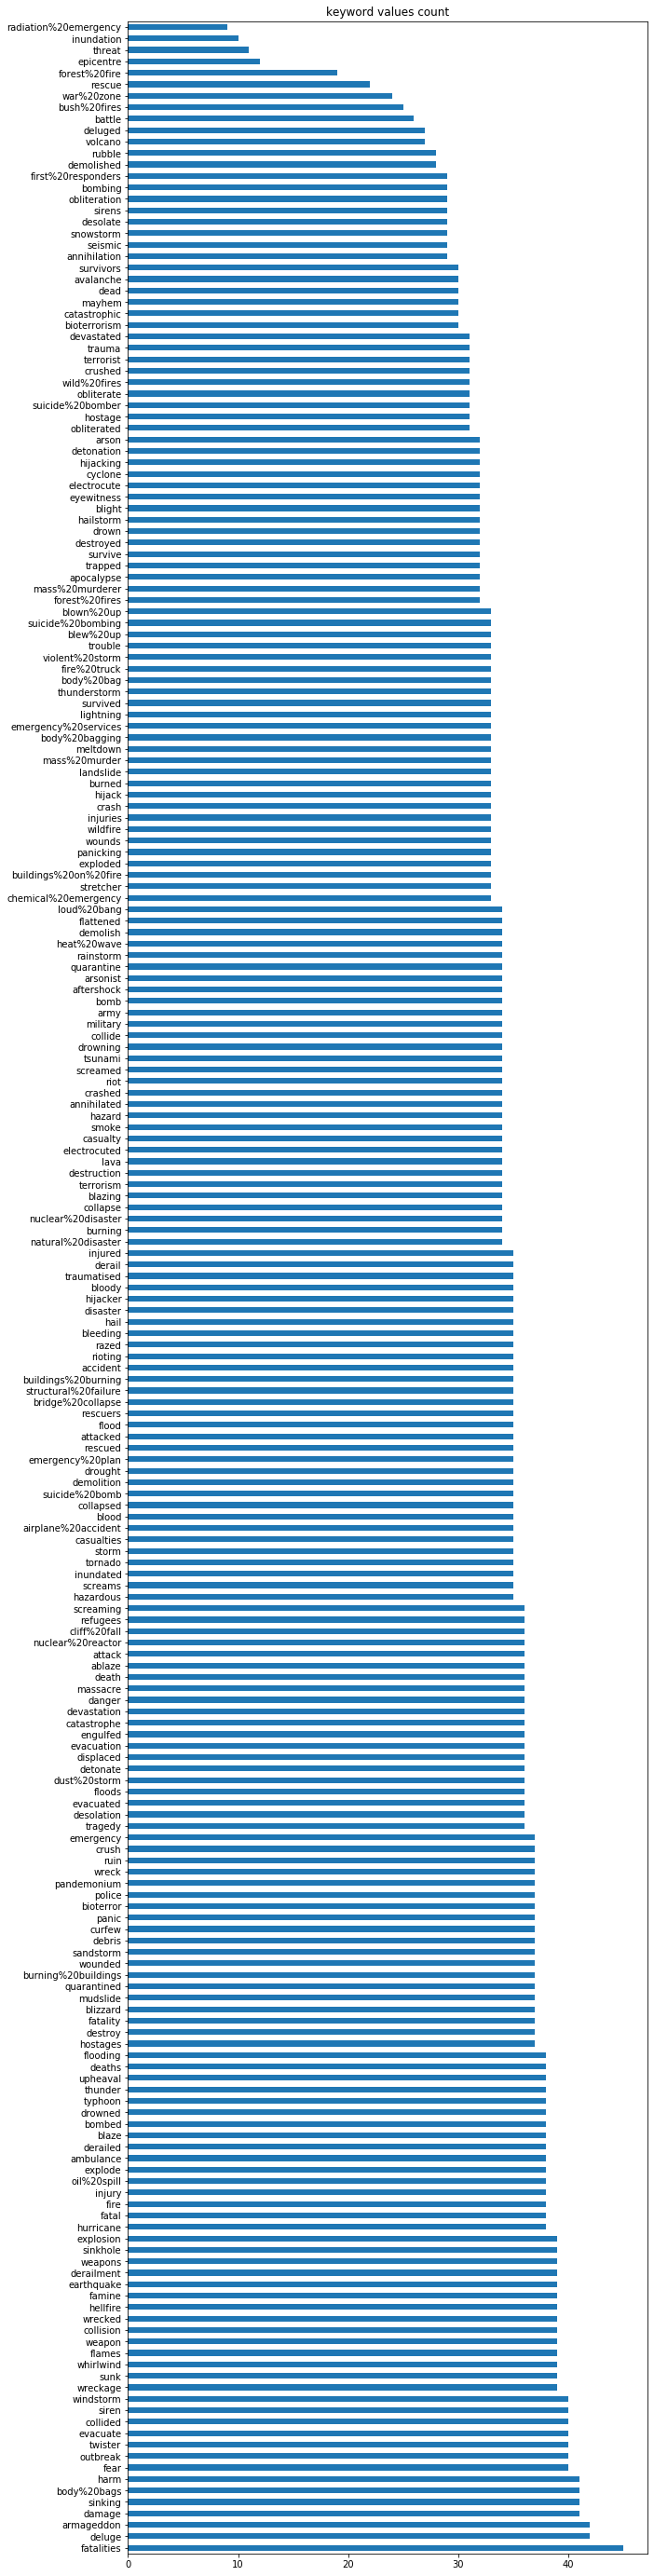

In [36]:
# Plot distribution
train['keyword'].dropna().value_counts().plot(kind='barh',
                                              x='keyword',
                                              y='count',
                                              title='keyword values count',
                                              figsize=(10,50))


Summary points:
* These variable does not hold a big amount of different values
* Missing data rate is not significative. It can be easy dropped or imputed without significative impact on predictive accuracy.
* Data containing could be useful 

###### location

Check number of different values

In [3]:
# Count number of different values on location column
# Train
location_uniq_train = train['location'].dropna().unique()
location_num_uniq_train = location_uniq_train.size

# Test
location_uniq_test = test['location'].dropna().unique()
location_num_uniq_test = location_uniq_test.size

# Display
print('location - Number of different values (training): {}'.format(location_num_uniq_train))
print('location - Number of different values (test): {}'.format(location_num_uniq_test))

# Ratio of different values respecting the amount of recors
print('Variability rate (train): {}'.format(location_num_uniq_train/len(train)))
print('Variability rate (test): {}'.format(location_num_uniq_test/len(test)))

location - Number of different values (training): 3341
location - Number of different values (test): 1602
Variability rate (train): 0.4388545908314725
Variability rate (test): 0.49095923996322405


In [4]:
print('Some examples of location values: {}'.format(location_uniq_train[:50]))

Some examples of location values: ['Birmingham' 'Est. September 2012 - Bristol' 'AFRICA' 'Philadelphia, PA'
 'London, UK' 'Pretoria' 'World Wide!!' 'Paranaque City' 'Live On Webcam'
 'milky way' 'GREENSBORO,NORTH CAROLINA' 'England.'
 'Sheffield Township, Ohio' 'India' 'Barbados' 'Anaheim' 'Abuja' 'USA'
 'South Africa' 'Sao Paulo, Brazil' 'hollywoodland '
 'Edmonton, Alberta - Treaty 6' 'Inang Pamantasan'
 'Twitter Lockout in progress' 'Concord, CA' 'Calgary, AB' 'San Francisco'
 'CLVLND' 'Nashville, TN' 'Santa Clara, CA' 'UK' 'St. Louis, MO'
 'Walker County, Alabama' 'Australia' 'North Carolina' 'Norf Carolina'
 'San Mateo County, CA' 'Njoro, Kenya' "Your Sister's Bedroom"
 'Arlington, TX' 'South Bloomfield, OH' 'New Hanover County, NC'
 'Maldives' 'Manchester, NH' 'Wilmington, NC' 'global'
 'Alberta | Sask. | Montana' 'Charlotte' 'Baton Rouge, LA'
 'Hagerstown, MD']


Check whether test set contains values not included in training

In [6]:
location_val_not_train = location_uniq_test[~np.isin(location_uniq_test,
                                                     location_uniq_train,
                                                     assume_unique=True)]
print('Number of values not included in train: {}'.format(location_val_not_train.size))

Number of values not included in train: 1180


In [8]:
# Show few values
location_val_not_train[:50]

array(["Niall's place | SAF 12 SQUAD |", 'Los Angeles, Califnordia',
       'threeonefive. ', 'Whoop Ass, Georgia', 'scarborough, ontario',
       '121 N La Salle St, Suite 500', 'Wandering', 'Homewood, PA',
       'Bexhill', 'Anime World', 'Cowtown, Caliii !!',
       'All Motorways, UK', 'Frankfurt, Germany', 'Gresham, OR',
       'Las Vegas ', 'Midland, Mi', 'SÌ£o Vicente, SÌ£o Paulo',
       'Vault 101, Fallout', 'Davis, CA', 'In your hearts and minds',
       'Runcorn', 'Lake Charles, LA', 'inland empire ca', 'Muscat',
       'USA - Global Online Sales ', 'Istanbul, TÌ_rkiye',
       'High in Prague with Aya', 'born on september 1st', 'New Orleans',
       'eileenborut,webster, tx', 'upstate NY', 'Salem, MA',
       'High Desert', 'Plovdiv, Bulgaria', 'Rhode Island, USA', 'U.S.A.',
       'Wayne, NJ', 'Az', 'Wheeler,Wis.', 'Spring Lake Park, MN',
       'DMZ, AZ', 'Instagram:marissatunis', 'Akron, Ohio ',
       'Currently Somewhere On Earth', 'Irvine, CA',
       'Somewhere in th

Check whether data does contain missing values

In [10]:
# Count missing data on location field
location_num_nan_train = train['location'].isna().sum() # Train
location_num_nan_test = test['location'].isna().sum()   # Test

print('(train) location - missing data: {} - missing data rate: {}'.format(location_num_nan_train,
                                                                           location_num_nan_train/len(train)))
print('(test) location - missing data: {} - missing data rate: {}'.format(location_num_nan_test,
                                                                           location_num_nan_test/len(test)))

(train) location - missing data: 2533 - missing data rate: 0.33272034677525286
(test) location - missing data: 1105 - missing data rate: 0.3386454183266932


Summary points:

* This variable holds a considerable rate of missing data for both datasets.
* Number of unique values are also considerable
* There are many values on test set not included in train set

On deciding to use this variable for prediction, further and deeper analysis must be done for dropping or trying to impute missing values. Besides, this variable pushes to use models or codifications which supports data values not included in the train set such as Decission Trees or Binnary encoding. 

###### target

Let's plot and compare each class ratio

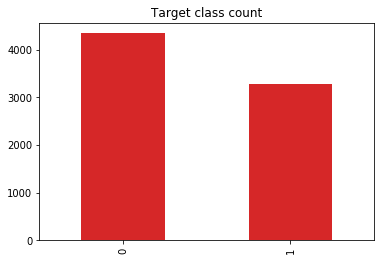

In [13]:
target_count = train['target'].value_counts()  # Count number of instances per target class
target_count.plot(kind='bar',
                  title='Target class count',
                  x='Class', y='count',
                  color='tab:red')

In [15]:
# Show target class rate
target_perc = target_count / len(train)

print('Percentages for each Target class:')
target_perc

Percentages for each Target class:


0    0.57034
1    0.42966
Name: target, dtype: float64

Classes holds certain umbalancing, despite it seems not to be significative.

###### Text

Check number of different values

In [11]:
# Count number of different values on text column
# Train
text_uniq_train = train['text'].dropna().unique()
text_num_uniq_train = text_uniq_train.size

# Test
text_uniq_test = test['text'].dropna().unique()
text_num_uniq_test = text_uniq_test.size

# Display
print('location - Number of different values (training): {}'.format(text_num_uniq_train))
print('location - Number of different values (test): {}'.format(text_num_uniq_test))

# Ratio of different values respecting the amount of recors
print('Variability rate (train): {}'.format(text_num_uniq_train/len(train)))
print('Variability rate (test): {}'.format(text_num_uniq_test/len(test)))

location - Number of different values (training): 7503
location - Number of different values (test): 3243
Variability rate (train): 0.9855510311309602
Variability rate (test): 0.9938706711615078


Show repeated texts on each dataset

In [24]:
pd.set_option('display.max_rows', None)                         # Disable max number of rows to be displayed
train[train['text'].duplicated(keep=False)].sort_values('text')

,id,keyword,location,text,target
4290,6094,hellfire,"Jubail IC, Saudi Arabia.",#Allah describes piling up #wealth thinking it...,0
4299,6105,hellfire,?????? ??? ?????? ????????,#Allah describes piling up #wealth thinking it...,0
4312,6123,hellfire,?????? ???? ??????,#Allah describes piling up #wealth thinking it...,1
6363,9095,suicide%20bomb,Nigeria,#Bestnaijamade: 16yr old PKK suicide bomber wh...,1
6373,9107,suicide%20bomb,Nigeria,#Bestnaijamade: 16yr old PKK suicide bomber wh...,1
6377,9113,suicide%20bomb,Nigeria,#Bestnaijamade: 16yr old PKK suicide bomber wh...,1
6378,9114,suicide%20bomb,Nigeria,#Bestnaijamade: 16yr old PKK suicide bomber wh...,1
6392,9135,suicide%20bomb,Nigeria,#Bestnaijamade: 16yr old PKK suicide bomber wh...,1
6366,9098,suicide%20bomb,Nigeria,#Bestnaijamade: 16yr old PKK suicide bomber wh...,1
2828,4064,displaced,NaN,#KCA #VoteJKT48ID 12News: UPDATE: A family of ...,1


In [25]:
test[test['text'].duplicated(keep=False)].sort_values('text')

,id,keyword,location,text
128,408,apocalypse,NaN,#AskConnor there's a zombie apocalypse. the it...
3114,10312,weapon,NaN,#AskConnor there's a zombie apocalypse. the it...
2741,9129,suicide%20bomb,Nigeria,#Bestnaijamade: 16yr old PKK suicide bomber wh...
2744,9138,suicide%20bomb,Nigeria,#Bestnaijamade: 16yr old PKK suicide bomber wh...
600,1947,burning%20buildings,US of Eh,.@denisleary Not sure how these folks rush int...
540,1765,buildings%20burning,US of Eh,.@denisleary Not sure how these folks rush int...
1233,4053,displaced,Pedophile hunting ground,.POTUS #StrategicPatience is a strategy for #G...
1234,4056,displaced,Pedophile hunting ground,.POTUS #StrategicPatience is a strategy for #G...
1544,5158,fatal,Baroda,11-Year-Old Boy Charged With Manslaughter of T...
1537,5123,fatal,Gurgaon,11-Year-Old Boy Charged With Manslaughter of T...


Following points can be observed from repeated values:

* Several repeated tweets with matching keyword, location and label: These can be considered repeated values and could be removed
* Many repeated tweets with same text and different location. Some of them presents different targets respecting the others.
* Few tweets with same text, location and keyword but target: This holds noisy data

Check for missing values

In [26]:
# Count missing data on text field
text_num_nan_train = train['text'].isna().sum() # Train
text_num_nan_test = test['text'].isna().sum()   # Test

print('(train) text - missing data: {} - missing data rate: {}'.format(text_num_nan_train,
                                                                           text_num_nan_train/len(train)))
print('(test) text - missing data: {} - missing data rate: {}'.format(text_num_nan_test,
                                                                           text_num_nan_test/len(test)))

(train) text - missing data: 0 - missing data rate: 0.0
(test) text - missing data: 0 - missing data rate: 0.0
